# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **Hardefa Rogonondo** | hardefarogonondo@gmail.com | **Tech Talent Recommendation Engine** |

# II. Notebook Target Definition

This notebook covers the EDA, data cleaning, and split for the Tech Talent Recommendation Engine Project. We begin by exploring the Stack Overflow survey dataset, focusing on key characteristics of tech professionals. After handling null values and dropping irrelevant rows and columns, we split the dataset into training and test sets, setting the stage for further normalization and encoding in the upcoming stages of model development.

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## III.B. Import Data

In [2]:
df = pd.read_pickle('../../data/processed/df.pkl')

In [3]:
df.head()

ResponseId                      MainBranch              Age  \
1           2  I am a developer by profession  25-34 years old   
2           3  I am a developer by profession  45-54 years old   
3           4  I am a developer by profession  25-34 years old   
4           5  I am a developer by profession  25-34 years old   
5           6  I am a developer by profession  35-44 years old   

                                          Employment  \
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   
5                                Employed, full-time   

                             RemoteWork  \
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   
5                                Remote   

                                             EdLevel YearsCode YearsCodePro  \
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        18            9   
2       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        27           23   
3       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        12            7   
4       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6            4   
5  Some college/university study without earning ...        21           21   

                                DevType                   OrgSize  \
1  Senior Executive (C-Suite, VP, etc.)          2 to 9 employees   
2                   Developer, back-end  5,000 to 9,999 employees   
3                  Developer, front-end      100 to 499 employees   
4                 Developer, full-stack        20 to 99 employees   
5                   Developer, back-end      100 to 499 employees   

                                             Country  \
1                           United States of America   
2                           United States of America   
3                           United States of America   
4                                        Philippines   
5  United Kingdom of Great Britain and Northern I...   

                    Currency  CompTotal  \
1  USD\tUnited States dollar   285000.0   
2  USD\tUnited States dollar   250000.0   
3  USD\tUnited States dollar   156000.0   
4       PHP\tPhilippine peso  1320000.0   
5        GBP\tPound sterling    78000.0   

                              LanguageHaveWorkedWith  \
1                         HTML/CSS;JavaScript;Python   
2                         Bash/Shell (all shells);Go   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;PH...   
4                     HTML/CSS;JavaScript;TypeScript   
5  Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...   

                              LanguageWantToWorkWith  \
1  Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...   
2                                 Haskell;OCaml;Rust   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...   
4         HTML/CSS;JavaScript;Python;Rust;TypeScript   
5                                            Go;Rust   

                      DatabaseHaveWorkedWith  \
1                                   Supabase   
2                                        NaN   
3                           PostgreSQL;Redis   
4  BigQuery;Elasticsearch;MongoDB;PostgreSQL   
5  BigQuery;Cloud Firestore;PostgreSQL;Redis   

                            DatabaseWantToWorkWith  \
1              Firebase Realtime Database;Supabase   
2                                              NaN   
3                                 PostgreSQL;Redis   
4  Elasticsearch;MongoDB;PostgreSQL;Redis;Supabase   
5                                              NaN   

                              PlatformHaveWorkedWith  \
1           Amazon Web Services (AWS);Netlify;Vercel   
2  Amazon Web Services (AWS);Google Cloud;OpenSta...   
3                                  Cloudflare;Heroku   
4  Amazon We

# IV. Exploratory Data Analysis

## IV.A. Data Shape Inspection

In [4]:
df.shape

(87973, 37)

## IV.B. Data Information Inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87973 entries, 1 to 89183
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      87973 non-null  int64  
 1   MainBranch                      87973 non-null  object 
 2   Age                             87973 non-null  object 
 3   Employment                      87898 non-null  object 
 4   RemoteWork                      73810 non-null  object 
 5   EdLevel                         87973 non-null  object 
 6   YearsCode                       87435 non-null  object 
 7   YearsCodePro                    66136 non-null  object 
 8   DevType                         76872 non-null  object 
 9   OrgSize                         65043 non-null  object 
 10  Country                         87973 non-null  object 
 11  Currency                        65334 non-null  object 
 12  CompTotal                       48225

## IV.C. Missing Values Inspection

In [6]:
df_missing = pd.DataFrame(
    df.isnull().sum().sort_values() / len(df) * 100).reset_index()
df_missing.columns = ["variables", "missing_percentage"]
df_missing

variables  missing_percentage
0                       ResponseId            0.000000
1                       MainBranch            0.000000
2                              Age            0.000000
3                          EdLevel            0.000000
4                          Country            0.000000
5                       Employment            0.085253
6                        YearsCode            0.611551
7           LanguageHaveWorkedWith            0.946881
8                OpSysPersonal use            1.609585
9     NEWCollabToolsHaveWorkedWith            2.397326
10   OfficeStackSyncHaveWorkedWith            5.153854
11          LanguageWantToWorkWith            8.257079
12           OpSysProfessional use           10.669183
13         ToolsTechHaveWorkedWith           11.468291
14                         DevType           12.618644
15    NEWCollabToolsWantToWorkWith           12.872131
16                      RemoteWork           16.099258
17          DatabaseHaveWorkedWith           16.525525
18   OfficeStackSyncWantToWorkWith           20.684756
19  OfficeStackAsyncHaveWorkedWith           21.464540
20         ToolsTechWantToWorkWith           22.345492
21          WebframeHaveWorkedWith           23.910745
22                    YearsCodePro           24.822389
23                        Currency           25.734032
24                         OrgSize           26.064815
25          PlatformHaveWorkedWith           27.673263
26          DatabaseWantToWorkWith           30.761711
27          MiscTechHaveWorkedWith           35.185796
28          WebframeWantToWorkWith           35.501802
29          AISearchHaveWorkedWith           35.971264
30  OfficeStackAsyncWantToWorkWith           38.909665
31          PlatformWantToWorkWith           41.677560
32                       CompTotal           45.182044
33          MiscTechWantToWorkWith           46.747297
34          AISearchWantToWorkWith           47.540723
35             AIDevHaveWorkedWith           70.554602
36             AIDevWantToWorkWith           77.735214

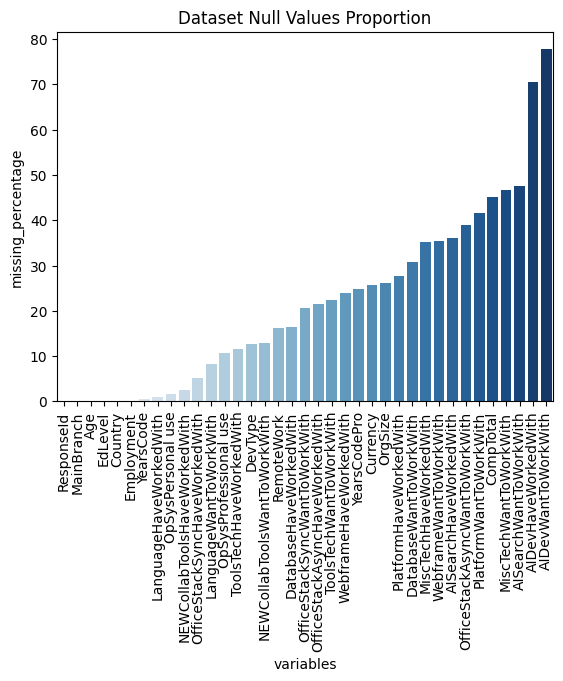

In [7]:
sns.barplot(data=df_missing,
            x="variables",
            y="missing_percentage",
            hue="variables",
            palette='Blues',
            legend=False)
plt.title("Dataset Null Values Proportion")
plt.xticks(rotation='vertical')
plt.show()

### IV.C.1. Missing Values Handling

In [8]:
def drop_irrelevant_and_missing_columns_above_threshold(df, cols_to_remove):
    df.drop(columns=cols_to_remove, inplace=True)
    return df


def drop_missing_rows_above_threshold(df, threshold):
    missing_per_row = df.isnull().sum(axis=1) / df.shape[1]
    df_filtered = df[missing_per_row <= threshold]
    return df_filtered

In [9]:
cols_to_remove = ["LanguageWantToWorkWith", "NEWCollabToolsWantToWorkWith", "OfficeStackSyncWantToWorkWith", "ToolsTechWantToWorkWith", "Currency", "DatabaseWantToWorkWith",
                  "WebframeWantToWorkWith", "AISearchHaveWorkedWith", "OfficeStackAsyncWantToWorkWith", "PlatformWantToWorkWith", "CompTotal", "MiscTechWantToWorkWith", "AISearchWantToWorkWith",
                  "AIDevHaveWorkedWith", "AIDevWantToWorkWith"]

In [10]:
df = drop_irrelevant_and_missing_columns_above_threshold(df, cols_to_remove)
df = drop_missing_rows_above_threshold(df, threshold=0.3)
df.shape

(80846, 22)

In [11]:
df.head()

ResponseId                      MainBranch              Age  \
1           2  I am a developer by profession  25-34 years old   
2           3  I am a developer by profession  45-54 years old   
3           4  I am a developer by profession  25-34 years old   
4           5  I am a developer by profession  25-34 years old   
5           6  I am a developer by profession  35-44 years old   

                                          Employment  \
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   
5                                Employed, full-time   

                             RemoteWork  \
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   
5                                Remote   

                                             EdLevel YearsCode YearsCodePro  \
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        18            9   
2       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        27           23   
3       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        12            7   
4       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6            4   
5  Some college/university study without earning ...        21           21   

                                DevType                   OrgSize  \
1  Senior Executive (C-Suite, VP, etc.)          2 to 9 employees   
2                   Developer, back-end  5,000 to 9,999 employees   
3                  Developer, front-end      100 to 499 employees   
4                 Developer, full-stack        20 to 99 employees   
5                   Developer, back-end      100 to 499 employees   

                                             Country  \
1                           United States of America   
2                           United States of America   
3                           United States of America   
4                                        Philippines   
5  United Kingdom of Great Britain and Northern I...   

                              LanguageHaveWorkedWith  \
1                         HTML/CSS;JavaScript;Python   
2                         Bash/Shell (all shells);Go   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;PH...   
4                     HTML/CSS;JavaScript;TypeScript   
5  Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...   

                      DatabaseHaveWorkedWith  \
1                                   Supabase   
2                                        NaN   
3                           PostgreSQL;Redis   
4  BigQuery;Elasticsearch;MongoDB;PostgreSQL   
5  BigQuery;Cloud Firestore;PostgreSQL;Redis   

                              PlatformHaveWorkedWith  \
1           Amazon Web Services (AWS);Netlify;Vercel   
2  Amazon Web Services (AWS);Google Cloud;OpenSta...   
3                                  Cloudflare;Heroku   
4  Amazon Web Services (AWS);Firebase;Heroku;Netl...   
5  Amazon Web Services (AWS);Cloudflare;Google Cloud   

                         WebframeHaveWorkedWith       MiscTechHaveWorkedWith  \
1                    Next.js;React;Remix;Vue.js  Electron;React Native;Tauri   
2                                           NaN                          NaN   
3  Node.js;React;Ruby on Rails;Vue.js;WordPress                          NaN   
4   Express;Gatsby;NestJS;Next.js;Node.js;React                          NaN   
5                Angular;Express;NestJS;Node.js                          NaN   

                         ToolsTechHaveWorkedWith  \
1    Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn   
2               Cargo;Docker;Kubernetes;Make;Nix   
3                 Homebrew;npm;Vite;Webpack;Yarn   
4                        Docker;npm;Webpack;Yarn   
5  Docker;Homebrew;Kubernetes;npm;pnpm;Terraform   

                    NEWCol

### IV.C.2. Missing Values Imputation for Categorical Columns

In [12]:
df.isnull().sum()

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                           23
RemoteWork                         8503
EdLevel                               0
YearsCode                           269
YearsCodePro                      15553
DevType                            5988
OrgSize                           16523
Country                               0
LanguageHaveWorkedWith              162
DatabaseHaveWorkedWith             9975
PlatformHaveWorkedWith            18603
WebframeHaveWorkedWith            16182
MiscTechHaveWorkedWith            26122
ToolsTechHaveWorkedWith            6800
NEWCollabToolsHaveWorkedWith        771
OpSysPersonal use                   586
OpSysProfessional use              6171
OfficeStackAsyncHaveWorkedWith    13286
OfficeStackSyncHaveWorkedWith      2155
dtype: int64

In [13]:
df = df.fillna(value="Null")

In [14]:
df.isnull().sum()

ResponseId                        0
MainBranch                        0
Age                               0
Employment                        0
RemoteWork                        0
EdLevel                           0
YearsCode                         0
YearsCodePro                      0
DevType                           0
OrgSize                           0
Country                           0
LanguageHaveWorkedWith            0
DatabaseHaveWorkedWith            0
PlatformHaveWorkedWith            0
WebframeHaveWorkedWith            0
MiscTechHaveWorkedWith            0
ToolsTechHaveWorkedWith           0
NEWCollabToolsHaveWorkedWith      0
OpSysPersonal use                 0
OpSysProfessional use             0
OfficeStackAsyncHaveWorkedWith    0
OfficeStackSyncHaveWorkedWith     0
dtype: int64

In [15]:
df.head()

ResponseId                      MainBranch              Age  \
1           2  I am a developer by profession  25-34 years old   
2           3  I am a developer by profession  45-54 years old   
3           4  I am a developer by profession  25-34 years old   
4           5  I am a developer by profession  25-34 years old   
5           6  I am a developer by profession  35-44 years old   

                                          Employment  \
1                                Employed, full-time   
2                                Employed, full-time   
3                                Employed, full-time   
4  Employed, full-time;Independent contractor, fr...   
5                                Employed, full-time   

                             RemoteWork  \
1                                Remote   
2  Hybrid (some remote, some in-person)   
3  Hybrid (some remote, some in-person)   
4                                Remote   
5                                Remote   

                                             EdLevel YearsCode YearsCodePro  \
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        18            9   
2       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        27           23   
3       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        12            7   
4       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6            4   
5  Some college/university study without earning ...        21           21   

                                DevType                   OrgSize  \
1  Senior Executive (C-Suite, VP, etc.)          2 to 9 employees   
2                   Developer, back-end  5,000 to 9,999 employees   
3                  Developer, front-end      100 to 499 employees   
4                 Developer, full-stack        20 to 99 employees   
5                   Developer, back-end      100 to 499 employees   

                                             Country  \
1                           United States of America   
2                           United States of America   
3                           United States of America   
4                                        Philippines   
5  United Kingdom of Great Britain and Northern I...   

                              LanguageHaveWorkedWith  \
1                         HTML/CSS;JavaScript;Python   
2                         Bash/Shell (all shells);Go   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;PH...   
4                     HTML/CSS;JavaScript;TypeScript   
5  Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...   

                      DatabaseHaveWorkedWith  \
1                                   Supabase   
2                                       Null   
3                           PostgreSQL;Redis   
4  BigQuery;Elasticsearch;MongoDB;PostgreSQL   
5  BigQuery;Cloud Firestore;PostgreSQL;Redis   

                              PlatformHaveWorkedWith  \
1           Amazon Web Services (AWS);Netlify;Vercel   
2  Amazon Web Services (AWS);Google Cloud;OpenSta...   
3                                  Cloudflare;Heroku   
4  Amazon Web Services (AWS);Firebase;Heroku;Netl...   
5  Amazon Web Services (AWS);Cloudflare;Google Cloud   

                         WebframeHaveWorkedWith       MiscTechHaveWorkedWith  \
1                    Next.js;React;Remix;Vue.js  Electron;React Native;Tauri   
2                                          Null                         Null   
3  Node.js;React;Ruby on Rails;Vue.js;WordPress                         Null   
4   Express;Gatsby;NestJS;Next.js;Node.js;React                         Null   
5                Angular;Express;NestJS;Node.js                         Null   

                         ToolsTechHaveWorkedWith  \
1    Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn   
2               Cargo;Docker;Kubernetes;Make;Nix   
3                 Homebrew;npm;Vite;Webpack;Yarn   
4                        Docker;npm;Webpack;Yarn   
5  Docker;Homebrew;Kubernetes;npm;pnpm;Terraform   

                    NEWCol

In [16]:
df.isnull().any()

ResponseId                        False
MainBranch                        False
Age                               False
Employment                        False
RemoteWork                        False
EdLevel                           False
YearsCode                         False
YearsCodePro                      False
DevType                           False
OrgSize                           False
Country                           False
LanguageHaveWorkedWith            False
DatabaseHaveWorkedWith            False
PlatformHaveWorkedWith            False
WebframeHaveWorkedWith            False
MiscTechHaveWorkedWith            False
ToolsTechHaveWorkedWith           False
NEWCollabToolsHaveWorkedWith      False
OpSysPersonal use                 False
OpSysProfessional use             False
OfficeStackAsyncHaveWorkedWith    False
OfficeStackSyncHaveWorkedWith     False
dtype: bool

## IV.D. Duplicated Values Inspection

In [17]:
df_duplicated = df[df.duplicated(keep=False)]
df_duplicated.shape

(0, 22)

In [18]:
df_duplicated

Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, EdLevel, YearsCode, YearsCodePro, DevType, OrgSize, Country, LanguageHaveWorkedWith, DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith, MiscTechHaveWorkedWith, ToolsTechHaveWorkedWith, NEWCollabToolsHaveWorkedWith, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackSyncHaveWorkedWith]
Index: []

## IV.E. Data Visualization

### IV.E.1. Main Branch Distribution

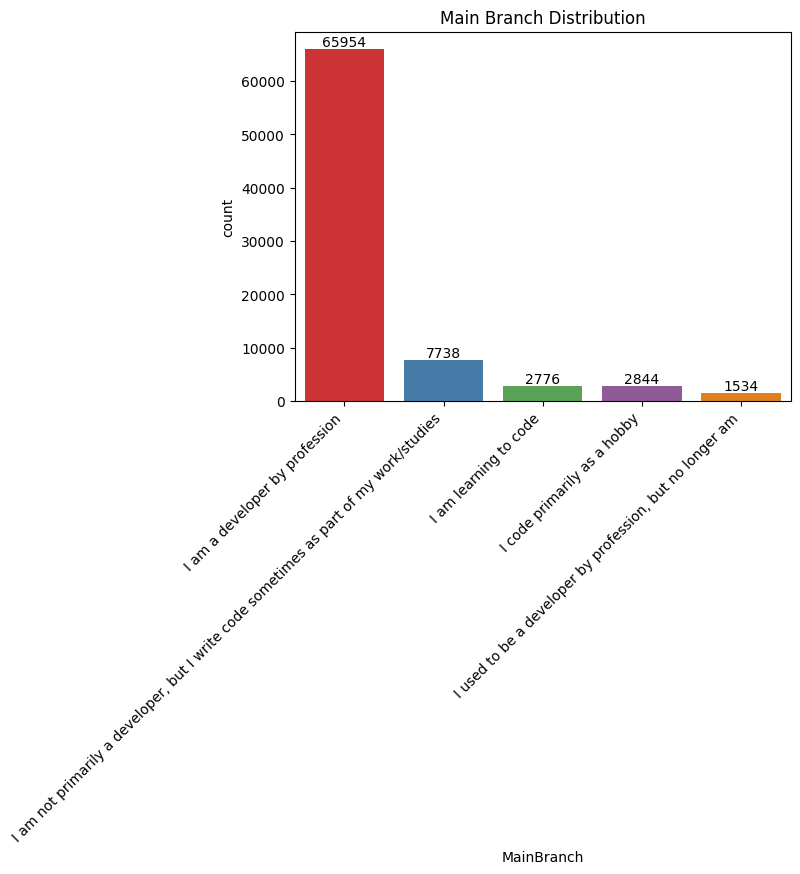

In [19]:
plt.title("Main Branch Distribution")
main_branch_distribution = sns.countplot(
    data=df, x="MainBranch", hue="MainBranch", palette='Set1', legend=False)
for container in main_branch_distribution.containers:
    main_branch_distribution.bar_label(container)
for item in main_branch_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.2. Age Distribution

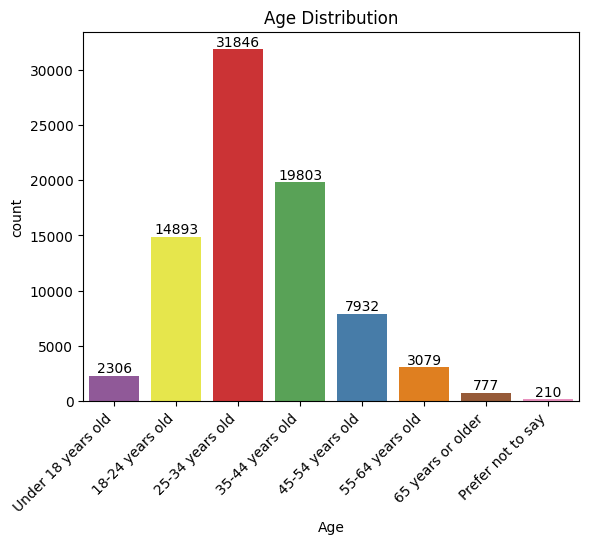

In [20]:
plt.title("Age Distribution")
custom_order = ["Under 18 years old", "18-24 years old", "25-34 years old", "35-44 years old",
                "45-54 years old", "55-64 years old", "65 years or older", "Prefer not to say"]
age_distribution = sns.countplot(
    data=df, x="Age", hue="Age", palette='Set1', order=custom_order, legend=False)
for container in age_distribution.containers:
    age_distribution.bar_label(container)
for item in age_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.3. Employment Distribution

In [21]:
employment_counts = {
    "Employed, full-time": 0,
    "Employed, part-time": 0,
    "Independent contractor, freelancer, or self-employed": 0,
    "Not employed, but looking for work": 0,
    "Not employed, and not looking for work": 0,
    "Student, full-time": 0,
    "Student, part-time": 0,
    "Retired": 0,
    "I prefer not to say": 0,
    "Null": 0
}

for entry in df["Employment"]:
    for option in entry.split(";"):
        employment_counts[option.strip()] += 1

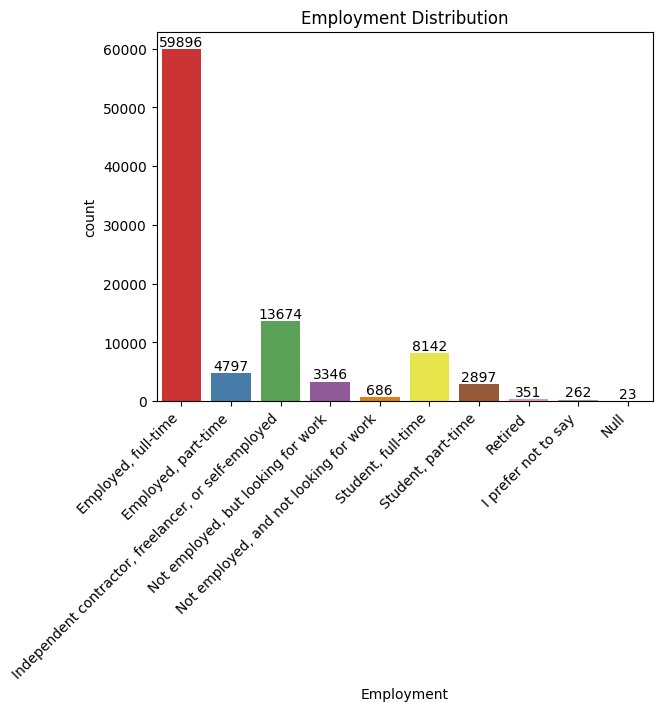

In [22]:
plt.title("Employment Distribution")
employment_distribution = sns.barplot(x=list(employment_counts.keys()), y=list(
    employment_counts.values()), hue=list(employment_counts.keys()), palette='Set1')
for container in employment_distribution.containers:
    employment_distribution.bar_label(container)
plt.ylabel("count")
plt.xlabel("Employment")
plt.xticks(rotation=45, ha='right')
plt.show()

### IV.E.4. Remote Work Preferences Distribution

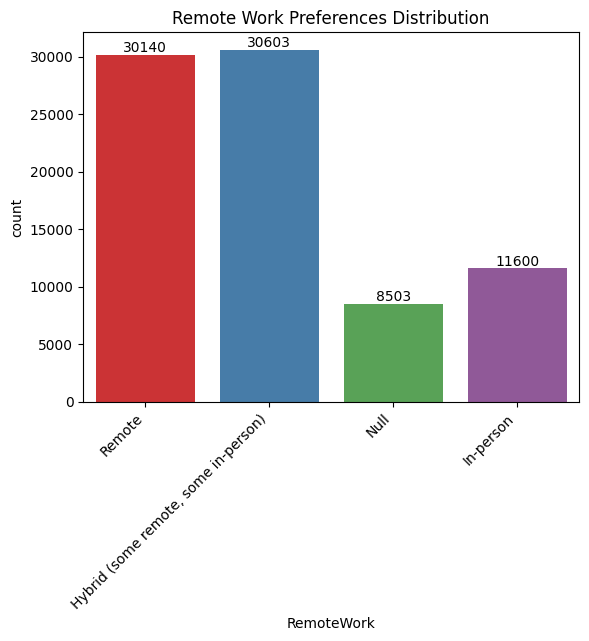

In [23]:
plt.title("Remote Work Preferences Distribution")
remote_work_distribution = sns.countplot(
    data=df, x="RemoteWork", hue="RemoteWork", palette='Set1', legend=False)
for container in remote_work_distribution.containers:
    remote_work_distribution.bar_label(container)
for item in remote_work_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.5. Education Level Distribution

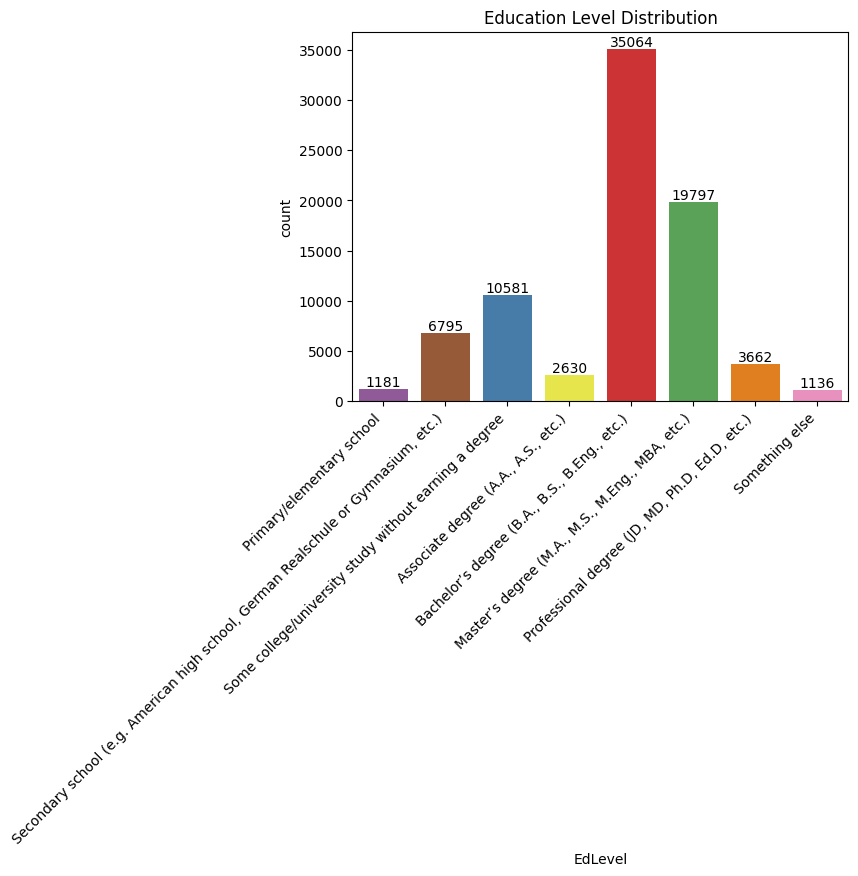

In [24]:
plt.title("Education Level Distribution")
custom_order = ["Primary/elementary school", "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)", "Some college/university study without earning a degree",
                "Associate degree (A.A., A.S., etc.)", "Bachelor’s degree (B.A., B.S., B.Eng., etc.)", "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
                "Professional degree (JD, MD, Ph.D, Ed.D, etc.)", "Something else"]
education_level_distribution = sns.countplot(
    data=df, x="EdLevel", hue="EdLevel", palette='Set1', order=custom_order, legend=False)
for container in education_level_distribution.containers:
    education_level_distribution.bar_label(container)
for item in education_level_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.6. Years Coding Distribution

In [25]:
df["YearsCode"].replace("More than 50 years", 51, inplace=True)
df["YearsCode"].replace("Less than 1 year", 0.5, inplace=True)
df["YearsCode"].replace("Null", 0, inplace=True)
df["YearsCode"] = pd.to_numeric(df["YearsCode"], errors='coerce')

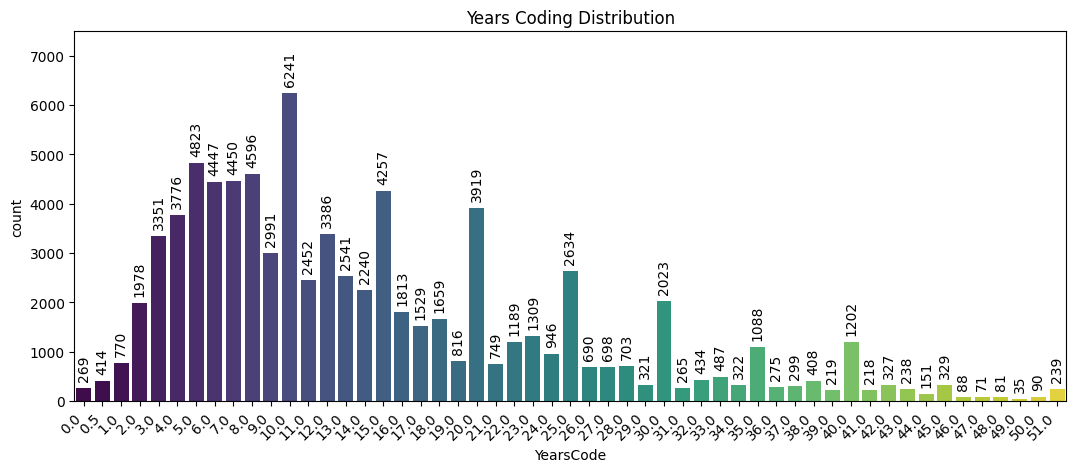

In [26]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Years Coding Distribution")
years_code_distribution = sns.countplot(data=df, x="YearsCode", hue="YearsCode", palette='viridis', order=sorted(
    df["YearsCode"].unique()), legend=False)
max_label = max([bar.get_height() for bar in years_code_distribution.patches])
for bar in years_code_distribution.patches:
    height = bar.get_height()
    years_code_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
years_code_distribution.set_ylim(0, max_label * 1.2)
for item in years_code_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.7. Professional Years Coding Distribution

In [27]:
df["YearsCodePro"].replace("More than 50 years", 51, inplace=True)
df["YearsCodePro"].replace("Less than 1 year", 0.5, inplace=True)
df["YearsCodePro"].replace("Null", 0, inplace=True)
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors='coerce')

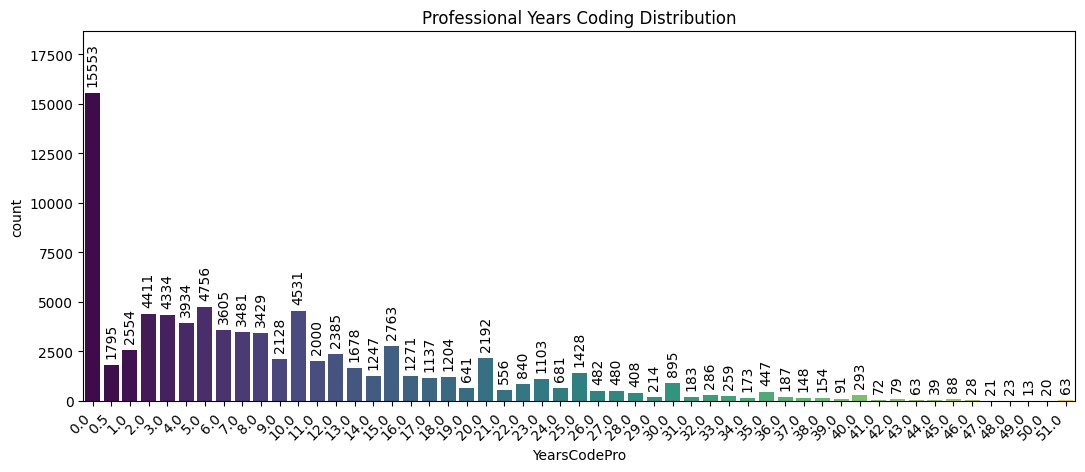

In [28]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Professional Years Coding Distribution")
years_code_distribution = sns.countplot(data=df, x="YearsCodePro", hue="YearsCodePro", palette='viridis', order=sorted(
    df["YearsCodePro"].unique()), legend=False)
max_label = max([bar.get_height() for bar in years_code_distribution.patches])
for bar in years_code_distribution.patches:
    height = bar.get_height()
    years_code_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
years_code_distribution.set_ylim(0, max_label * 1.2)
for item in years_code_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.8. Developer Type Distribution

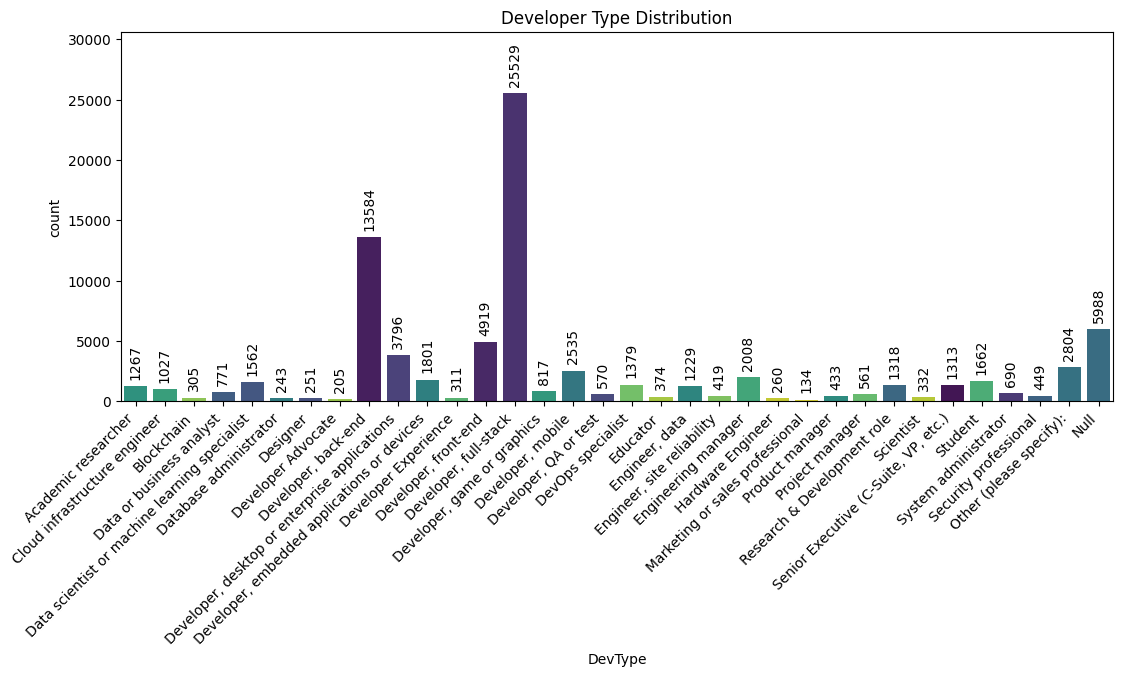

In [29]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Developer Type Distribution")
custom_order = ["Academic researcher", "Cloud infrastructure engineer", "Blockchain", "Data or business analyst", "Data scientist or machine learning specialist", "Database administrator",
                "Designer", "Developer Advocate", "Developer, back-end", "Developer, desktop or enterprise applications", "Developer, embedded applications or devices", "Developer Experience",
                "Developer, front-end", "Developer, full-stack", "Developer, game or graphics", "Developer, mobile", "Developer, QA or test", "DevOps specialist", "Educator", "Engineer, data",
                "Engineer, site reliability", "Engineering manager", "Hardware Engineer", "Marketing or sales professional", "Product manager", "Project manager", "Research & Development role",
                "Scientist", "Senior Executive (C-Suite, VP, etc.)", "Student", "System administrator", "Security professional", "Other (please specify):", "Null"]
dev_type_distribution = sns.countplot(
    data=df, x="DevType", hue="DevType", palette='viridis', order=custom_order, legend=False)
max_label = max([bar.get_height() for bar in dev_type_distribution.patches])
for bar in dev_type_distribution.patches:
    height = bar.get_height()
    dev_type_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
dev_type_distribution.set_ylim(0, max_label * 1.2)
for item in dev_type_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.9. Organization Size Distribution

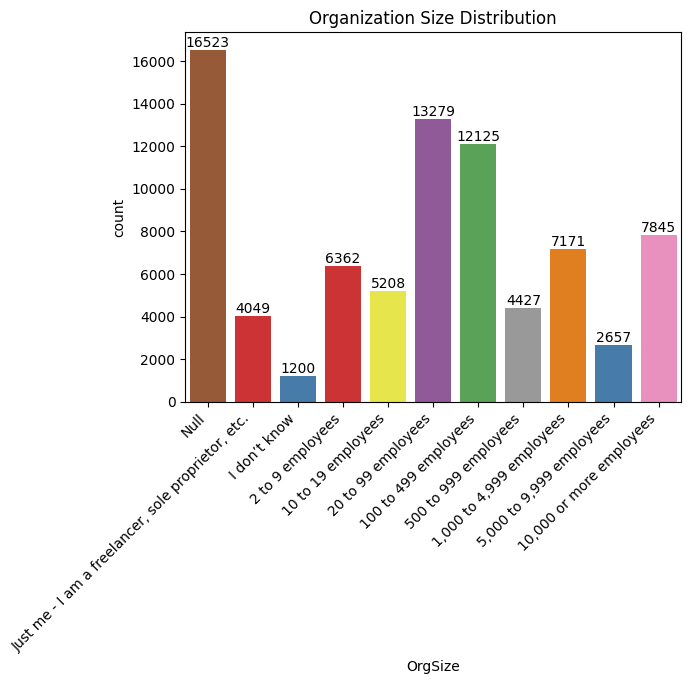

In [30]:
plt.title("Organization Size Distribution")
custom_order = ["Null", "Just me - I am a freelancer, sole proprietor, etc.", "I don’t know", "2 to 9 employees", "10 to 19 employees", "20 to 99 employees", "100 to 499 employees",
                "500 to 999 employees", "1,000 to 4,999 employees", "5,000 to 9,999 employees", "10,000 or more employees"]
org_size_distribution = sns.countplot(
    data=df, x="OrgSize", hue="OrgSize", palette='Set1', order=custom_order, legend=False)
for container in org_size_distribution.containers:
    org_size_distribution.bar_label(container)
for item in org_size_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.10. Country Distribution

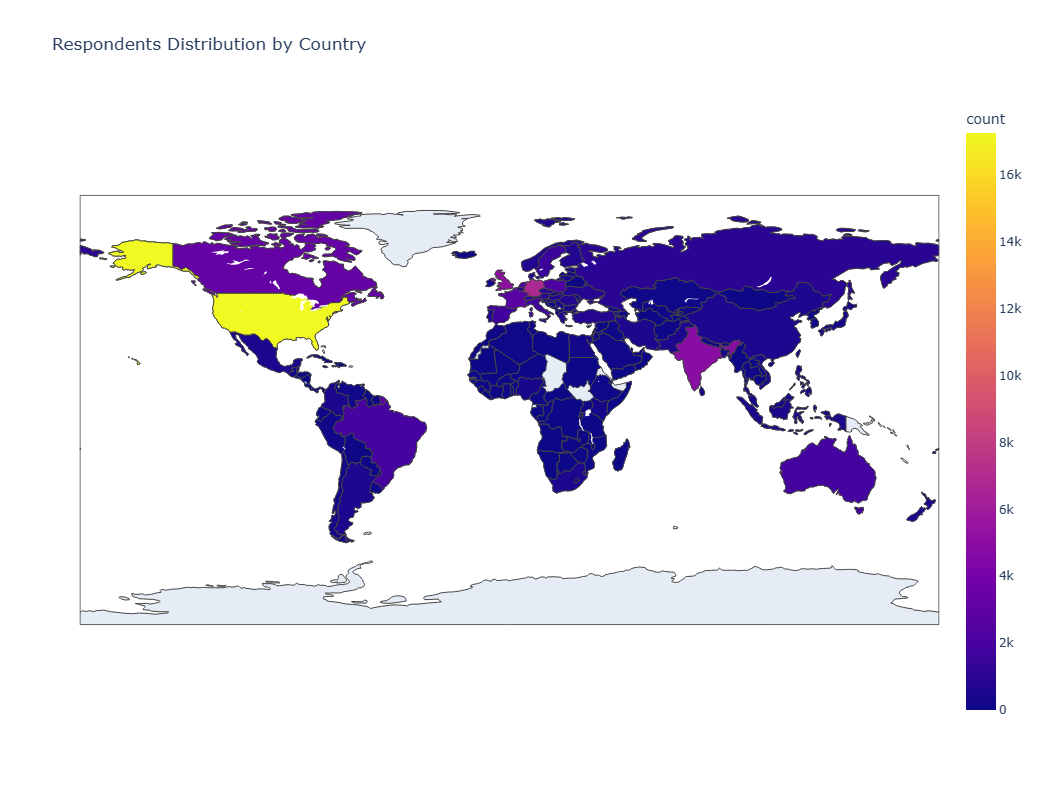

In [31]:
country_count = df["Country"].value_counts().reset_index()
country_count.columns = ["country", "count"]
fig = px.choropleth(country_count,
                    locations = "country",
                    locationmode = 'country names',
                    color = "count",
                    hover_name = "country",
                    color_continuous_scale = px.colors.sequential.Plasma,
                    title = "Respondents Distribution by Country")
fig.update_layout(autosize = False, width = 1000, height = 800)
fig.show()

### IV.E.11. Programming Language Used Distribution

In [32]:
language_counts = {
    "Ada": 0,
    "Apex": 0,
    "APL": 0,
    "Assembly": 0,
    "Bash/Shell (all shells)": 0,
    "C": 0,
    "C#": 0,
    "C++": 0,
    "Clojure": 0,
    "Cobol": 0,
    "Crystal": 0,
    "Dart": 0,
    "Delphi": 0,
    "Elixir": 0,
    "Erlang": 0,
    "F#": 0,
    "Flow": 0,
    "Fortran": 0,
    "GDScript": 0,
    "Go": 0,
    "Groovy": 0,
    "Haskell": 0,
    "HTML/CSS": 0,
    "Java": 0,
    "JavaScript": 0,
    "Julia": 0,
    "Kotlin": 0,
    "Lisp": 0,
    "Lua": 0,
    "MATLAB": 0,
    "Nim": 0,
    "Objective-C": 0,
    "OCaml": 0,
    "Perl": 0,
    "PHP": 0,
    "PowerShell": 0,
    "Prolog": 0,
    "Python": 0,
    "R": 0,
    "Raku": 0,
    "Ruby": 0,
    "Rust": 0,
    "SAS": 0,
    "Scala": 0,
    "Solidity": 0,
    "SQL": 0,
    "Swift": 0,
    "TypeScript": 0,
    "VBA": 0,
    "Visual Basic (.Net)": 0,
    "Zig": 0,
    "Other": 0,
    "Null":0
}

for entry in df["LanguageHaveWorkedWith"]:
    for option in entry.split(";"):
        language = option.strip()
        if language in language_counts:
            language_counts[language] += 1
        else:
            language_counts["Other"] += 1

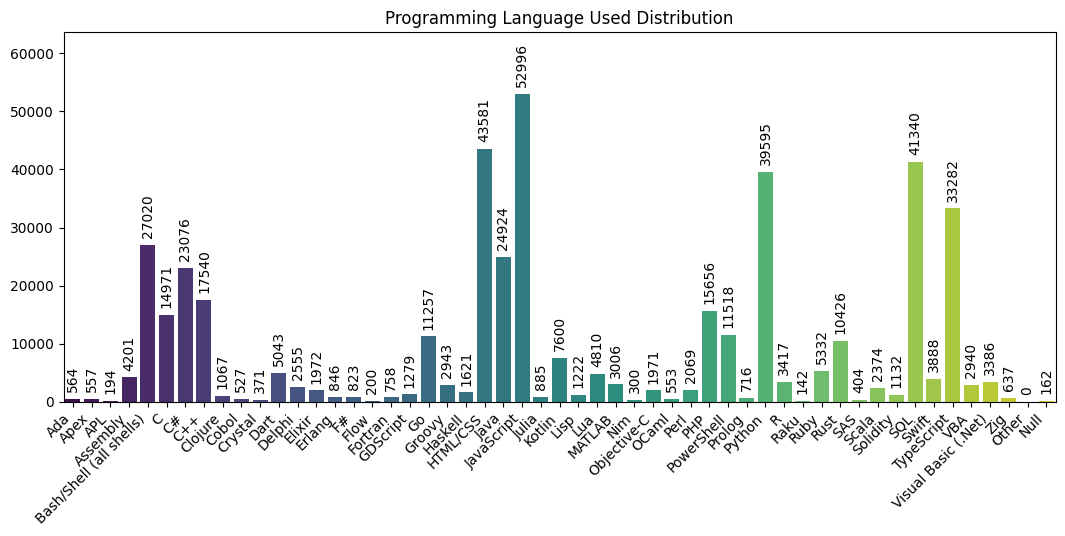

In [33]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Programming Language Used Distribution")
languages = list(language_counts.keys())
counts = list(language_counts.values())
language_distribution = sns.barplot(
    x=languages, y=counts, hue=languages, palette='viridis')
max_label = max(counts)
for bar in language_distribution.patches:
    height = bar.get_height()
    language_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
language_distribution.set_ylim(0, max_label * 1.2)
for item in language_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.12. Database Used Distribution

In [34]:
database_counts = {
    "BigQuery": 0,
    "Cassandra": 0,
    "Clickhouse": 0,
    "Cloud Firestore": 0,
    "Cockroachdb": 0,
    "Cosmos DB": 0,
    "Couch DB": 0,
    "Couchbase": 0,
    "Datomic": 0,
    "DuckDB": 0,
    "Dynamodb": 0,
    "Elasticsearch": 0,
    "Firebase Realtime Database": 0,
    "Firebird": 0,
    "H2": 0,
    "IBM DB2": 0,
    "InfluxDB": 0,
    "MariaDB": 0,
    "Microsoft Access": 0,
    "Microsoft SQL Server": 0,
    "MongoDB": 0,
    "MySQL": 0,
    "Neo4J": 0,
    "Oracle": 0,
    "PostgreSQL": 0,
    "RavenDB": 0,
    "Redis": 0,
    "Snowflake": 0,
    "Solr": 0,
    "SQLite": 0,
    "Supabase": 0,
    "TiDB": 0,
    "Other": 0,
    "Null": 0
}

for entry in df["DatabaseHaveWorkedWith"]:
    for option in entry.split(";"):
        database = option.strip()
        if database in database_counts:
            database_counts[database] += 1
        else:
            database_counts["Other"] += 1

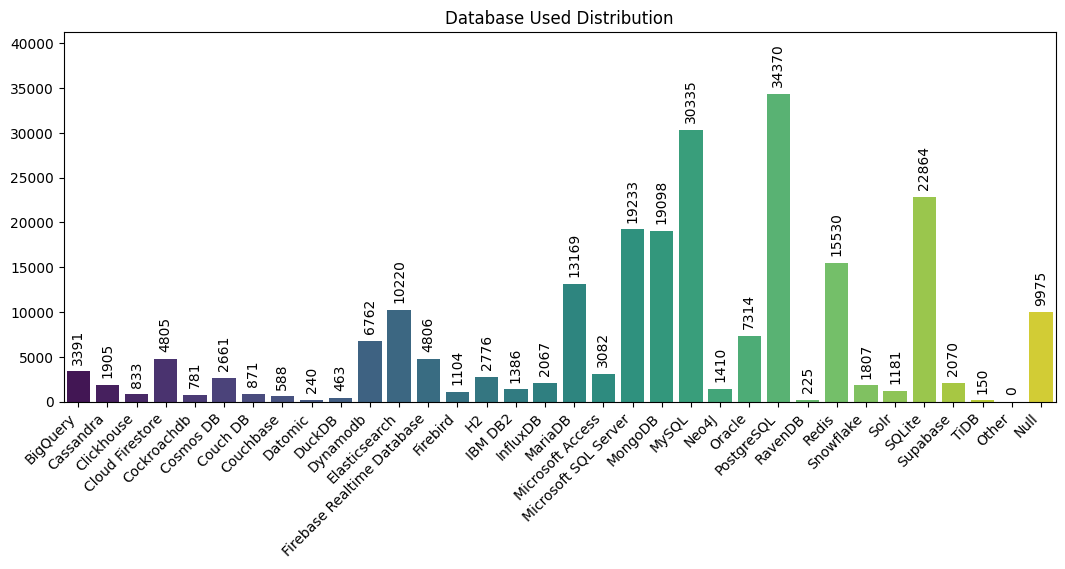

In [35]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Database Used Distribution")
databases = list(database_counts.keys())
counts = list(database_counts.values())
database_distribution = sns.barplot(
    x=databases, y=counts, hue=databases, palette='viridis')
max_label = max(counts)
for bar in database_distribution.patches:
    height = bar.get_height()
    database_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
database_distribution.set_ylim(0, max_label * 1.2)
for item in database_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.13. Cloud Platform Used Distribution

In [36]:
platform_counts = {
    "Amazon Web Services (AWS)": 0,
    "Cloudflare": 0,
    "Colocation": 0,
    "Digital Ocean": 0,
    "Firebase": 0,
    "Fly.io": 0,
    "Google Cloud": 0,
    "Heroku": 0,
    "Hetzner": 0,
    "IBM Cloud Or Watson": 0,
    "Linode": 0,
    "Managed Hosting": 0,
    "Microsoft Azure": 0,
    "Netlify": 0,
    "OpenShift": 0,
    "OpenStack": 0,
    "Oracle Cloud Infrastructure (OCI)": 0,
    "OVH": 0,
    "Render": 0,
    "Scaleway": 0,
    "Vercel": 0,
    "VMware": 0,
    "Vultr": 0,
    "Other": 0,
    "Null": 0
}

for entry in df["PlatformHaveWorkedWith"]:
    for option in entry.split(";"):
        platform = option.strip()
        if platform in platform_counts:
            platform_counts[platform] += 1
        else:
            platform_counts["Other"] += 1

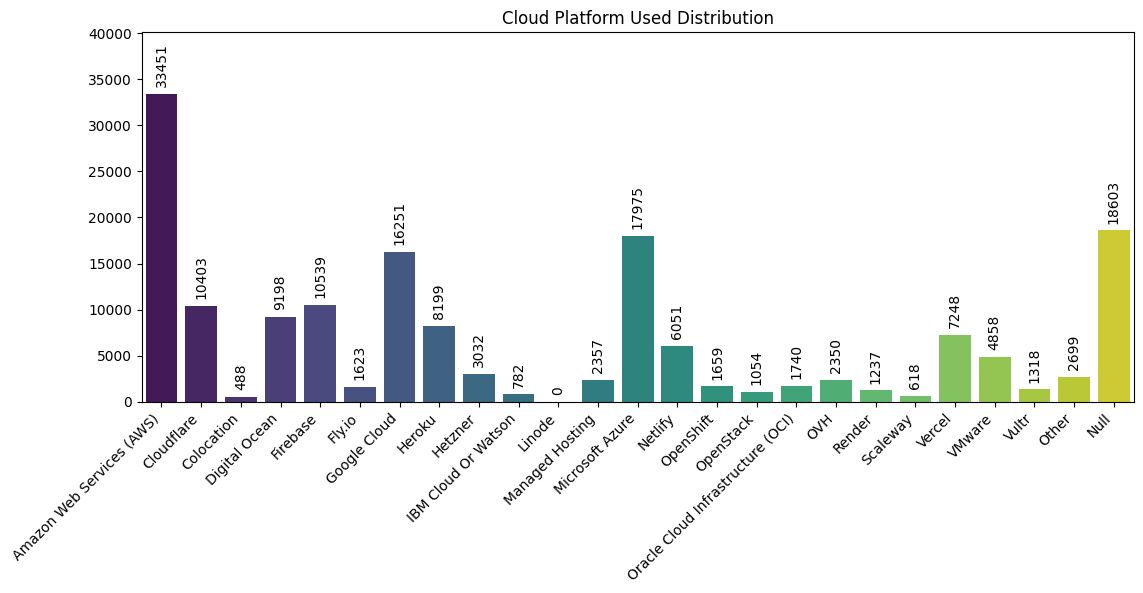

In [37]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Cloud Platform Used Distribution")
platforms = list(platform_counts.keys())
counts = list(platform_counts.values())
platform_distribution = sns.barplot(
    x=platforms, y=counts, hue=platforms, palette='viridis')
max_label = max(counts)
for bar in platform_distribution.patches:
    height = bar.get_height()
    platform_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
platform_distribution.set_ylim(0, max_label * 1.2)
for item in platform_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.14. Webframework Used Distribution

In [38]:
webframe_counts = {
    "Angular": 0,
    "AngularJS": 0,
    "ASP.NET": 0,
    "ASP.NET CORE": 0,
    "Blazor": 0,
    "CodeIgniter": 0,
    "Deno": 0,
    "Django": 0,
    "Drupal": 0,
    "Elm": 0,
    "Express": 0,
    "FastAPI": 0,
    "Fastify": 0,
    "Flask": 0,
    "Gatsby": 0,
    "jQuery": 0,
    "Laravel": 0,
    "Lit": 0,
    "NestJS": 0,
    "Next.js": 0,
    "Node.js": 0,
    "Nuxt.js": 0,
    "Phoenix": 0,
    "Play Framework": 0,
    "Qwik": 0,
    "React": 0,
    "Remix": 0,
    "Ruby on Rails": 0,
    "Solid.js": 0,
    "Spring Boot": 0,
    "Svelte": 0,
    "Symfony": 0,
    "Vue.js": 0,
    "WordPress": 0,
    "Other": 0,
    "Null": 0
}

for entry in df["WebframeHaveWorkedWith"]:
    for option in entry.split(";"):
        webframe = option.strip()
        if webframe in webframe_counts:
            webframe_counts[webframe] += 1
        else:
            webframe_counts["Other"] += 1

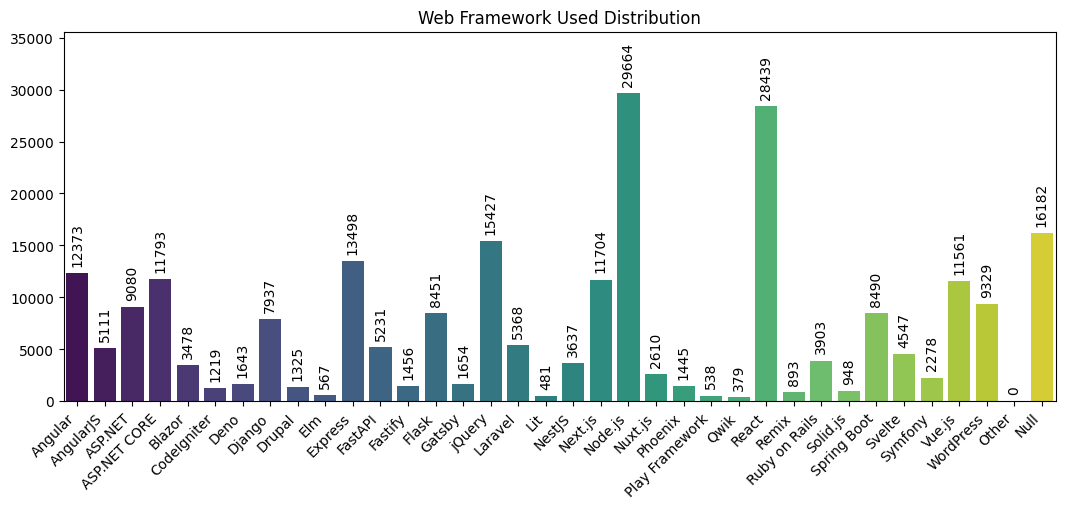

In [39]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Web Framework Used Distribution")
webframes = list(webframe_counts.keys())
counts = list(webframe_counts.values())
webframe_distribution = sns.barplot(
    x=webframes, y=counts, hue=webframes, palette='viridis')
max_label = max(counts)
for bar in webframe_distribution.patches:
    height = bar.get_height()
    webframe_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
webframe_distribution.set_ylim(0, max_label * 1.2)
for item in webframe_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.15. Other Framework Used Distribution

In [40]:
misctech_counts = {
    ".NET (5+)": 0,
    ".NET Framework (1.0 - 4.8)": 0,
    ".NET MAUI": 0,
    "Apache Kafka": 0,
    "Apache Spark": 0,
    "Capacitor": 0,
    "Cordova": 0,
    "CUDA": 0,
    "Electron": 0,
    "Flutter": 0,
    "GTK": 0,
    "Hadoop": 0,
    "Hugging Face Transformers": 0,
    "Ionic": 0,
    "JAX": 0,
    "Keras": 0,
    "Ktor": 0,
    "MFC": 0,
    "Micronaut": 0,
    "NumPy": 0,
    "Opencv": 0,
    "OpenGL": 0,
    "Pandas": 0,
    "Qt": 0,
    "Quarkus": 0,
    "RabbitMQ": 0,
    "React Native": 0,
    "Scikit-Learn": 0,
    "Spring Framework": 0,
    "SwiftUI": 0,
    "Tauri": 0,
    "TensorFlow": 0,
    "Tidyverse": 0,
    "Torch/PyTorch": 0,
    "Uno Platform": 0,
    "Xamarin": 0,
    "Other": 0,
    "Null": 0
}

for entry in df["MiscTechHaveWorkedWith"]:
    for option in entry.split(";"):
        misctech = option.strip()
        if misctech in misctech_counts:
            misctech_counts[misctech] += 1
        else:
            misctech_counts["Other"] += 1

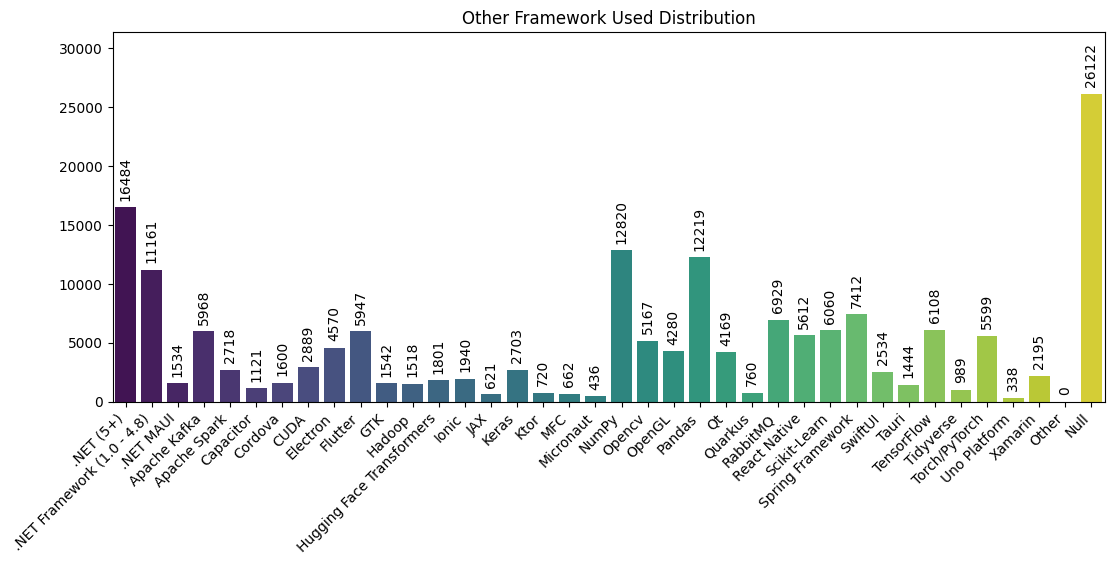

In [41]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Other Framework Used Distribution")
misctechs = list(misctech_counts.keys())
counts = list(misctech_counts.values())
misctech_distribution = sns.barplot(
    x=misctechs, y=counts, hue=misctechs, palette='viridis')
max_label = max(counts)
for bar in misctech_distribution.patches:
    height = bar.get_height()
    misctech_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
misctech_distribution.set_ylim(0, max_label * 1.2)
for item in misctech_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.16. Developer Tools Used Distribution

In [42]:
toolstech_counts = {
    "Ansible": 0,
    "Ant": 0,
    "APT": 0,
    "bandit": 0,
    "Boost.Test": 0,
    "build2": 0,
    "Bun": 0,
    "Cargo": 0,
    "Catch2": 0,
    "Chef": 0,
    "Chocolatey": 0,
    "CMake": 0,
    "Composer": 0,
    "cppunit": 0,
    "CUTE": 0,
    "Dagger": 0,
    "Docker": 0,
    "doctest": 0,
    "ELFspy": 0,
    "GNU GCC": 0,
    "Godot": 0,
    "Google Test": 0,
    "Gradle": 0,
    "Homebrew": 0,
    "Kubernetes": 0,
    "lest": 0,
    "liblittletest": 0,
    "LLVM's Clang": 0,
    "Make": 0,
    "Maven (build tool)": 0,
    "Meson": 0,
    "MSBuild": 0,
    "MSVC": 0,
    "Ninja": 0,
    "Nix": 0,
    "npm": 0,
    "NuGet": 0,
    "Pacman": 0,
    "Pip": 0,
    "pnpm": 0,
    "Podman": 0,
    "Pulumi": 0,
    "Puppet": 0,
    "QMake": 0,
    "SCons": 0,
    "snitch": 0,
    "Terraform": 0,
    "tunit": 0,
    "Unity 3D": 0,
    "Unreal Engine": 0,
    "Visual Studio Solution": 0,
    "Vite": 0,
    "Wasmer": 0,
    "Webpack": 0,
    "Yarn": 0,
    "Other": 0,
    "Null": 0
}

for entry in df["ToolsTechHaveWorkedWith"]:
    for option in entry.split(";"):
        toolstech = option.strip()
        if toolstech in toolstech_counts:
            toolstech_counts[toolstech] += 1
        else:
            toolstech_counts["Other"] += 1

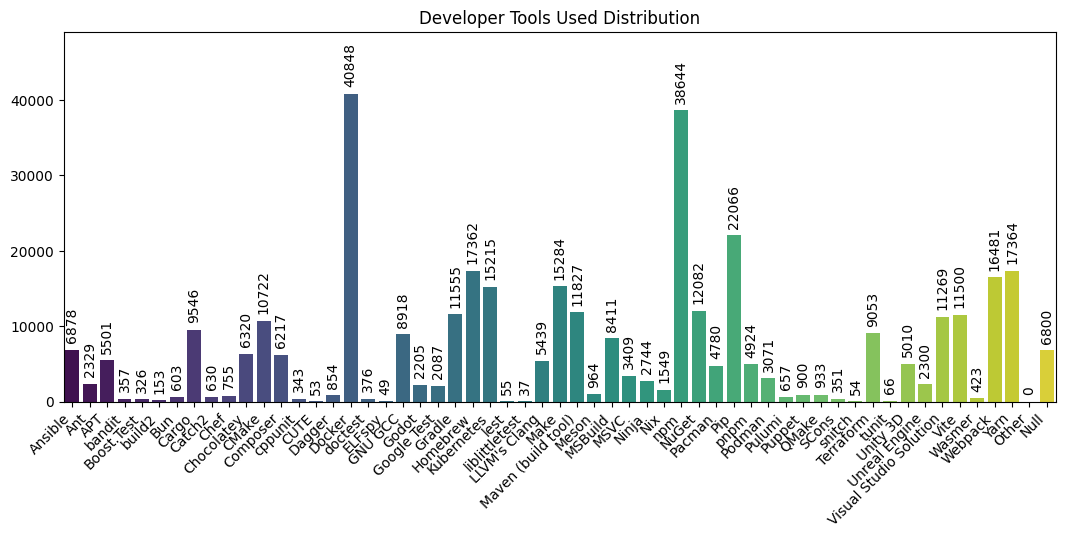

In [43]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Developer Tools Used Distribution")
toolstech = list(toolstech_counts.keys())
counts = list(toolstech_counts.values())
toolstech_distribution = sns.barplot(
    x=toolstech, y=counts, hue=toolstech, palette='viridis')
max_label = max(counts)
for bar in toolstech_distribution.patches:
    height = bar.get_height()
    toolstech_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
toolstech_distribution.set_ylim(0, max_label * 1.2)
for item in toolstech_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.17. Development Environment Used Distribution

In [44]:
collabtool_counts = {
    "Android Studio": 0,
    "Atom": 0,
    "BBEdit": 0,
    "CLion": 0,
    "Code::Blocks": 0,
    "condo": 0,
    "DataGrip": 0,
    "Eclipse": 0,
    "Emacs": 0,
    "Fleet": 0,
    "Geany": 0,
    "Goland": 0,
    "Helix": 0,
    "IntelliJ IDEA": 0,
    "IPython": 0,
    "Jupyter Notebook/JupyterLab": 0,
    "Kate": 0,
    "Micro": 0,
    "Nano": 0,
    "Neovim": 0,
    "Netbeans": 0,
    "Notepad++": 0,
    "Nova": 0,
    "PhpStorm": 0,
    "PyCharm": 0,
    "Qt Creator": 0,
    "Rad Studio (Delphi, C++ Builder)": 0,
    "Rider": 0,
    "RStudio": 0,
    "RubyMine": 0,
    "Spyder": 0,
    "Sublime Text": 0,
    "TextMate": 0,
    "Vim": 0,
    "Visual Studio": 0,
    "Visual Studio Code": 0,
    "VSCodium": 0,
    "WebStorm": 0,
    "Xcode": 0,
    "Other": 0,
    "Null": 0
}

for entry in df["NEWCollabToolsHaveWorkedWith"]:
    for option in entry.split(";"):
        collabtool = option.strip()
        if collabtool in collabtool_counts:
            collabtool_counts[collabtool] += 1
        else:
            collabtool_counts["Other"] += 1

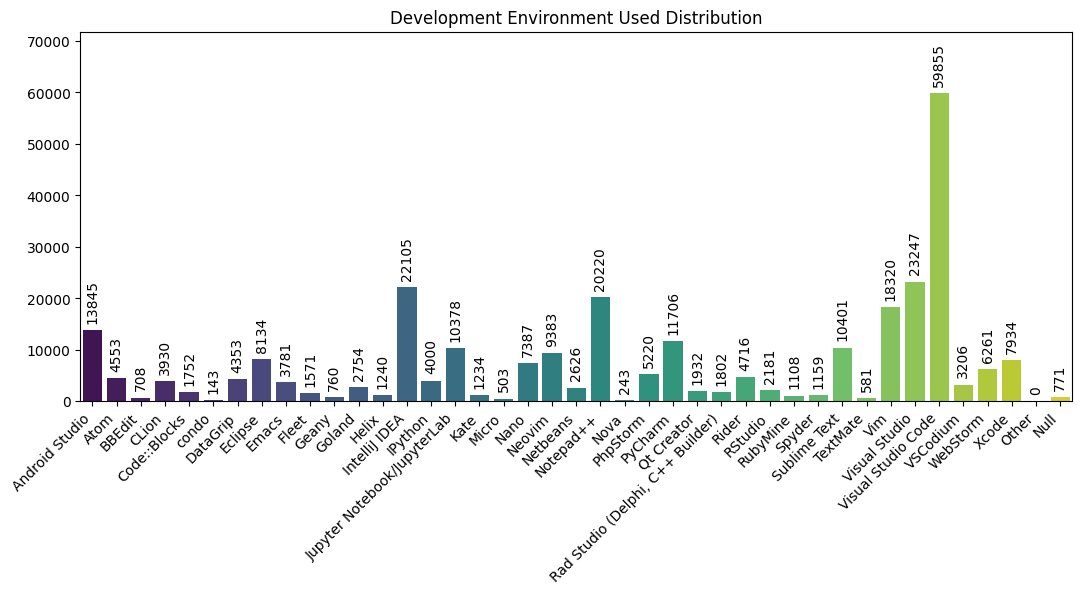

In [45]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Development Environment Used Distribution")
collabtools = list(collabtool_counts.keys())
counts = list(collabtool_counts.values())
collabtools_distribution = sns.barplot(
    x=collabtools, y=counts, hue=collabtools, palette='viridis')
max_label = max(counts)
for bar in collabtools_distribution.patches:
    height = bar.get_height()
    collabtools_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
collabtools_distribution.set_ylim(0, max_label * 1.2)
for item in collabtools_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.18. Operating System for Personal Usage Distribution

In [46]:
opsys_personal_counts = {
    "AIX": 0,
    "Android": 0,
    "Arch": 0,
    "BSD": 0,
    "ChromeOS": 0,
    "Cygwin": 0,
    "Debian": 0,
    "Fedora": 0,
    "Haiku": 0,
    "iOS": 0,
    "iPadOS": 0,
    "MacOS": 0,
    "Other Linux-based": 0,
    "Red Hat": 0,
    "Solaris": 0,
    "Ubuntu": 0,
    "Windows": 0,
    "Windows Subsystem for Linux (WSL)": 0,
    "Other": 0,
    "Null": 0
}

for entry in df["OpSysPersonal use"]:
    for option in entry.split(";"):
        opsys_personal = option.strip()
        if opsys_personal in opsys_personal_counts:
            opsys_personal_counts[opsys_personal] += 1
        else:
            opsys_personal_counts["Other"] += 1

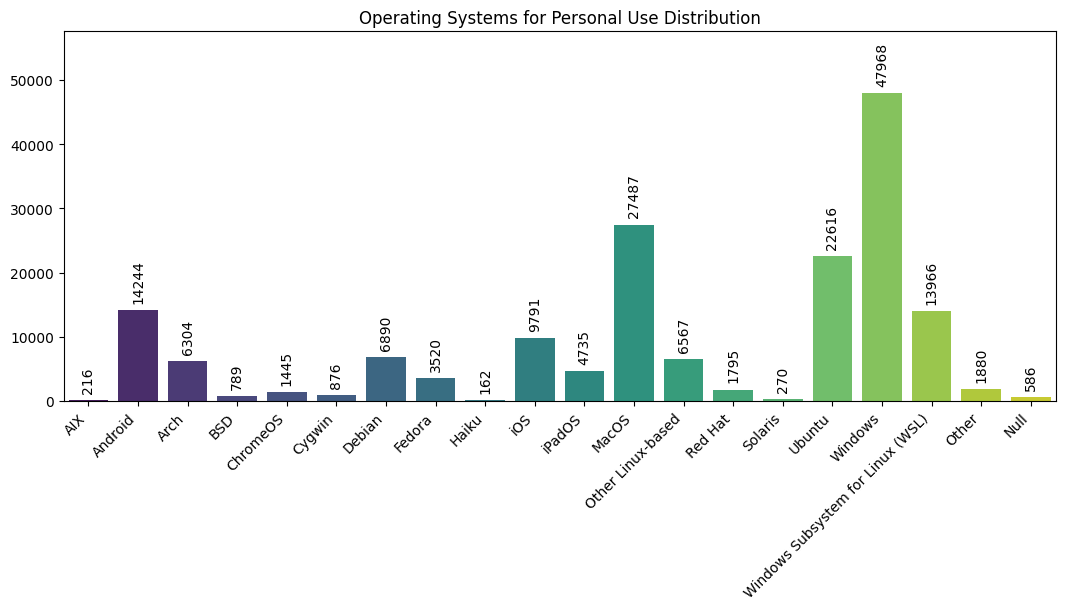

In [47]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Operating Systems for Personal Use Distribution")
opsystems = list(opsys_personal_counts.keys())
counts = list(opsys_personal_counts.values())
opsys_personal_distribution = sns.barplot(
    x=opsystems, y=counts, hue=opsystems, palette='viridis')
max_label = max(counts)
for bar in opsys_personal_distribution.patches:
    height = bar.get_height()
    opsys_personal_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
opsys_personal_distribution.set_ylim(0, max_label * 1.2)
for item in opsys_personal_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

In [48]:
total_excluding_other_and_null = sum(value for key, value in opsys_personal_counts.items() if key not in ["Other", "Null"])
print("Total excluding 'Other' and 'Null':", total_excluding_other_and_null)

Total excluding 'Other' and 'Null': 169641


### IV.E.19. Operating System for Professional Usage Distribution

In [49]:
opsys_professional_counts = {
    "AIX": 0,
    "Android": 0,
    "Arch": 0,
    "BSD": 0,
    "ChromeOS": 0,
    "Cygwin": 0,
    "Debian": 0,
    "Fedora": 0,
    "Haiku": 0,
    "iOS": 0,
    "iPadOS": 0,
    "MacOS": 0,
    "Other Linux-based": 0,
    "Red Hat": 0,
    "Solaris": 0,
    "Ubuntu": 0,
    "Windows": 0,
    "Windows Subsystem for Linux (WSL)": 0,
    "Other": 0,
    "Null": 0
}

for entry in df["OpSysProfessional use"]:
    for option in entry.split(";"):
        opsys_professional = option.strip()
        if opsys_professional in opsys_professional_counts:
            opsys_professional_counts[opsys_professional] += 1
        else:
            opsys_professional_counts["Other"] += 1

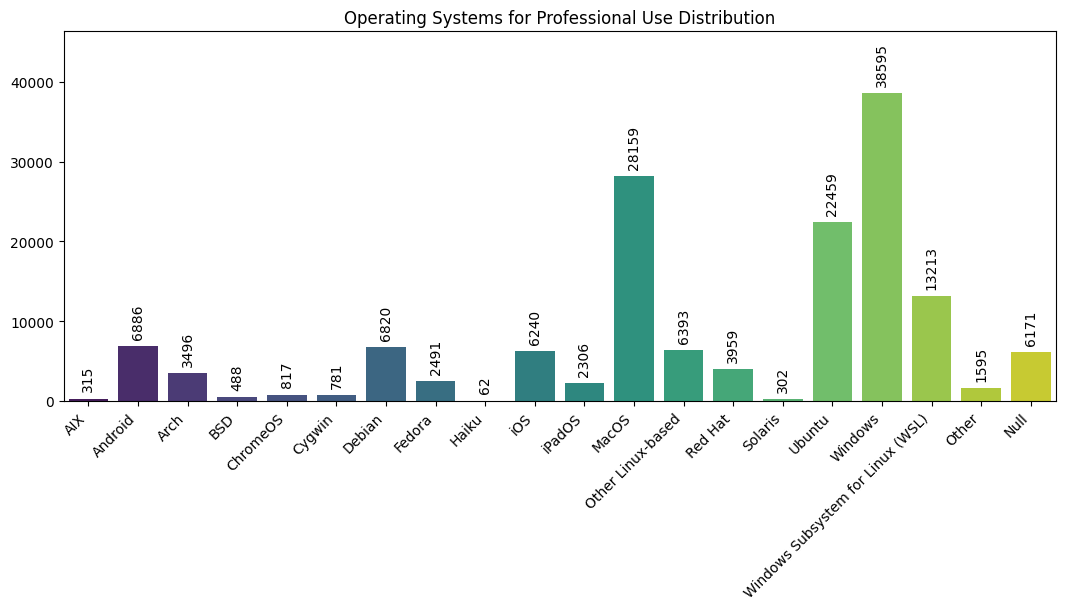

In [50]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Operating Systems for Professional Use Distribution")
opsystems = list(opsys_professional_counts.keys())
counts = list(opsys_professional_counts.values())
opsys_professional_distribution = sns.barplot(
    x=opsystems, y=counts, hue=opsystems, palette='viridis')
max_label = max(counts)
for bar in opsys_professional_distribution.patches:
    height = bar.get_height()
    opsys_professional_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
opsys_professional_distribution.set_ylim(0, max_label * 1.2)
for item in opsys_professional_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

In [51]:
total_excluding_other_and_null = sum(value for key, value in opsys_professional_counts.items() if key not in ["Other", "Null"])
print("Total excluding 'Other' and 'Null':", total_excluding_other_and_null)

Total excluding 'Other' and 'Null': 143782


### IV.E.20. Collaborative Work Management Tools Used Distribution

In [52]:
officestack_counts = {
    "Adobe Workfront": 0,
    "Airtable": 0,
    "Asana": 0,
    "Azure Devops": 0,
    "Basecamp": 0,
    "Cerri": 0,
    "Clickup": 0,
    "Confluence": 0,
    "Dingtalk (Teambition)": 0,
    "Document360": 0,
    "Doxygen": 0,
    "GitHub Discussions": 0,
    "Jira": 0,
    "Leankor": 0,
    "Linear": 0,
    "Markdown File": 0,
    "Microsoft Lists": 0,
    "Microsoft Planner": 0,
    "Miro": 0,
    "Monday.com": 0,
    "Notion": 0,
    "Nuclino": 0,
    "Planview Projectplace Or Clarizen": 0,
    "Redmine": 0,
    "Redocly": 0,
    "Shortcut": 0,
    "Smartsheet": 0,
    "Stack Overflow for Teams": 0,
    "Swit": 0,
    "Tettra": 0,
    "Trello": 0,
    "Wikis": 0,
    "Wimi": 0,
    "Workzone": 0,
    "Wrike": 0,
    "YouTrack": 0,
    "Other": 0,
    "Null": 0
}

for entry in df["OfficeStackAsyncHaveWorkedWith"]:
    for option in entry.split(";"):
        officestack = option.strip()
        if officestack in officestack_counts:
            officestack_counts[officestack] += 1
        else:
            officestack_counts["Other"] += 1

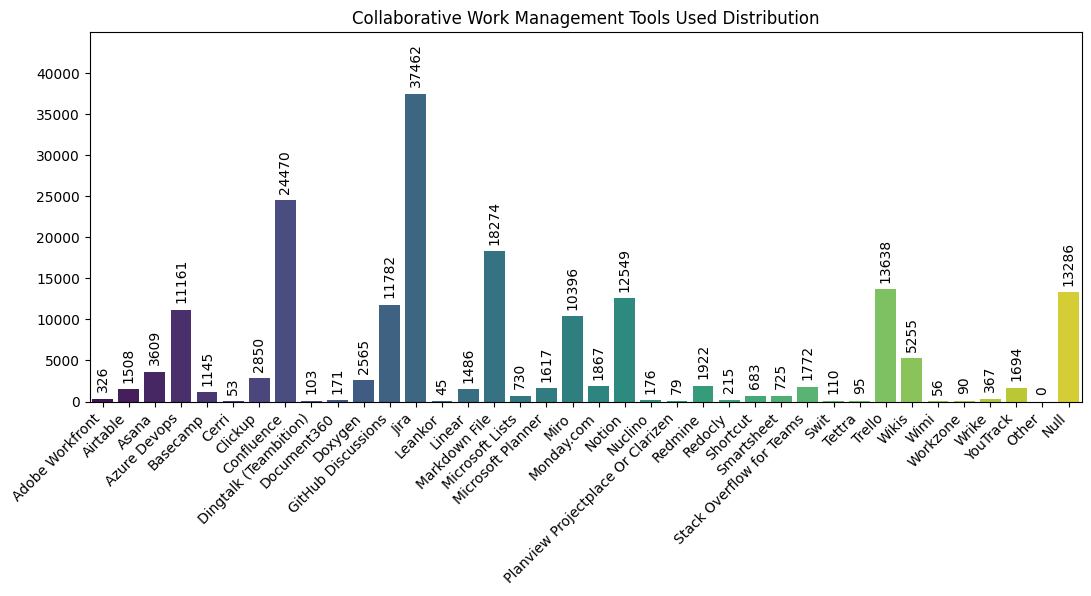

In [53]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Collaborative Work Management Tools Used Distribution")
office_tools = list(officestack_counts.keys())
counts = list(officestack_counts.values())
officestack_distribution = sns.barplot(
    x=office_tools, y=counts, hue=office_tools, palette='viridis')
max_label = max(counts)
for bar in officestack_distribution.patches:
    height = bar.get_height()
    officestack_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
officestack_distribution.set_ylim(0, max_label * 1.2)
for item in officestack_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.21. Communication Tools Used Distribution

In [54]:
sync_officestack_counts = {
    "Cisco Webex Teams": 0,
    "Coolfire Core": 0,
    "Discord": 0,
    "Google Chat": 0,
    "Google Meet": 0,
    "IRC": 0,
    "Jitsi": 0,
    "Matrix": 0,
    "Mattermost": 0,
    "Microsoft Teams": 0,
    "Ringcentral": 0,
    "Rocketchat": 0,
    "Signal": 0,
    "Skype": 0,
    "Slack": 0,
    "Symphony": 0,
    "Telegram": 0,
    "Unify Circuit": 0,
    "Whatsapp": 0,
    "Wickr": 0,
    "Wire": 0,
    "Zoom": 0,
    "Zulip": 0,
    "Other": 0,
    "Null": 0
}

for entry in df["OfficeStackSyncHaveWorkedWith"]:
    for option in entry.split(";"):
        sync_officestack = option.strip()
        if sync_officestack in sync_officestack_counts:
            sync_officestack_counts[sync_officestack] += 1
        else:
            sync_officestack_counts["Other"] += 1

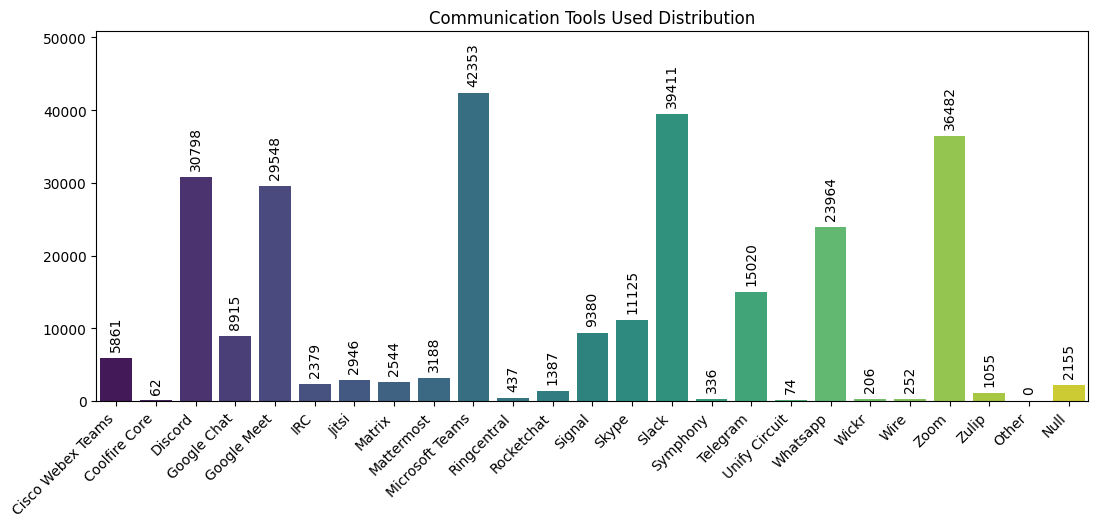

In [55]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Communication Tools Used Distribution")
sync_tools = list(sync_officestack_counts.keys())
counts = list(sync_officestack_counts.values())
sync_officestack_distribution = sns.barplot(
    x=sync_tools, y=counts, hue=sync_tools, palette='viridis')
max_label = max(counts)
for bar in sync_officestack_distribution.patches:
    height = bar.get_height()
    sync_officestack_distribution.annotate('{:.0f}'.format(height), (bar.get_x() + bar.get_width(
    ) / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)
sync_officestack_distribution.set_ylim(0, max_label * 1.2)
for item in sync_officestack_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

# V. Preprocessing

## V.A. Unused Column Removal

In [56]:
def unused_column_removal(df, cols_to_remove):
    df.drop(columns=cols_to_remove, inplace=True)
    return df

In [57]:
cols_to_remove = ["MainBranch", "Employment", "YearsCodePro", "OrgSize", "OpSysProfessional use"]

In [58]:
unused_column_removal(df, cols_to_remove)
df.shape

(80846, 17)

In [59]:
df.head()

ResponseId              Age                            RemoteWork  \
1           2  25-34 years old                                Remote   
2           3  45-54 years old  Hybrid (some remote, some in-person)   
3           4  25-34 years old  Hybrid (some remote, some in-person)   
4           5  25-34 years old                                Remote   
5           6  35-44 years old                                Remote   

                                             EdLevel  YearsCode  \
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)       18.0   
2       Bachelor’s degree (B.A., B.S., B.Eng., etc.)       27.0   
3       Bachelor’s degree (B.A., B.S., B.Eng., etc.)       12.0   
4       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        6.0   
5  Some college/university study without earning ...       21.0   

                                DevType  \
1  Senior Executive (C-Suite, VP, etc.)   
2                   Developer, back-end   
3                  Developer, front-end   
4                 Developer, full-stack   
5                   Developer, back-end   

                                             Country  \
1                           United States of America   
2                           United States of America   
3                           United States of America   
4                                        Philippines   
5  United Kingdom of Great Britain and Northern I...   

                              LanguageHaveWorkedWith  \
1                         HTML/CSS;JavaScript;Python   
2                         Bash/Shell (all shells);Go   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;PH...   
4                     HTML/CSS;JavaScript;TypeScript   
5  Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...   

                      DatabaseHaveWorkedWith  \
1                                   Supabase   
2                                       Null   
3                           PostgreSQL;Redis   
4  BigQuery;Elasticsearch;MongoDB;PostgreSQL   
5  BigQuery;Cloud Firestore;PostgreSQL;Redis   

                              PlatformHaveWorkedWith  \
1           Amazon Web Services (AWS);Netlify;Vercel   
2  Amazon Web Services (AWS);Google Cloud;OpenSta...   
3                                  Cloudflare;Heroku   
4  Amazon Web Services (AWS);Firebase;Heroku;Netl...   
5  Amazon Web Services (AWS);Cloudflare;Google Cloud   

                         WebframeHaveWorkedWith       MiscTechHaveWorkedWith  \
1                    Next.js;React;Remix;Vue.js  Electron;React Native;Tauri   
2                                          Null                         Null   
3  Node.js;React;Ruby on Rails;Vue.js;WordPress                         Null   
4   Express;Gatsby;NestJS;Next.js;Node.js;React                         Null   
5                Angular;Express;NestJS;Node.js                         Null   

                         ToolsTechHaveWorkedWith  \
1    Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn   
2               Cargo;Docker;Kubernetes;Make;Nix   
3                 Homebrew;npm;Vite;Webpack;Yarn   
4                        Docker;npm;Webpack;Yarn   
5  Docker;Homebrew;Kubernetes;npm;pnpm;Terraform   

                    NEWCollabToolsHaveWorkedWith  \
1                         Vim;Visual Studio Code   
2                                    Emacs;Helix   
3  IntelliJ IDEA;Vim;Visual Studio Code;WebStorm   
4                         Vim;Visual Studio Code   
5                                   Helix;Neovim   

                                   OpSysPersonal use  \
1  iOS;iPadOS;MacOS;Windows;Windows Subsystem for...   
2                            MacOS;Other Linux-based   
3                                   iOS;iPadOS;MacOS   
4                            Other (Please Specify):   
5                            Other (Please Specify):   

                      OfficeStackAsyncHaveWorkedWith  \
1  Asana;Basecamp;GitHub Discussions;Jira;Linear;...   
2             Markdown File;Stack Overflow for Teams

## V.B. Special Entries Rows Cleaning

In [60]:
allowed_dev_type = ["Academic researcher", "Cloud infrastructure engineer", "Blockchain", "Data or business analyst", "Data scientist or machine learning specialist",
                    "Database administrator", "Designer", "Developer Advocate", "Developer, back-end", "Developer, desktop or enterprise applications",
                    "Developer, embedded applications or devices", "Developer Experience", "Developer, front-end", "Developer, full-stack", "Developer, game or graphics", "Developer, mobile",
                    "Developer, QA or test", "DevOps specialist", "Educator", "Engineer, data", "Engineer, site reliability", "Engineering manager", "Hardware Engineer",
                    "Marketing or sales professional", "Product manager", "Project manager", "Research & Development role", "Scientist", "Senior Executive (C-Suite, VP, etc.)", "Student",
                    "System administrator", "Security professional", "Null"]

allowed_platform = ["Amazon Web Services (AWS)", "Cloudflare", "Colocation", "Digital Ocean", "Firebase", "Fly.io", "Google Cloud", "Heroku", "Hetzner", "IBM Cloud Or Watson", "Linode",
                    "Managed Hosting", "Microsoft Azure", "Netlify", "OpenShift", "OpenStack", "Oracle Cloud Infrastructure (OCI)", "OVH", "Render", "Scaleway", "Vercel", "VMware", "Vultr",
                    "Null"]

allowed_opsys = ["AIX", "Android", "Arch", "BSD", "ChromeOS", "Cygwin", "Debian", "Fedora", "Haiku", "iOS", "iPadOS", "MacOS", "Other Linux-based", "Red Hat", "Solaris", "Ubuntu", "Windows",
                 "Windows Subsystem for Linux (WSL)", "Null"]

In [61]:
df = df[df["DevType"].isin(allowed_dev_type)]
df = df[df["PlatformHaveWorkedWith"].apply(lambda x: all(
    item.strip() in allowed_platform for item in x.split(';')))]
df = df[df["OpSysPersonal use"].apply(lambda x: all(
    item.strip() in allowed_opsys for item in x.split(';')))]
df.shape

(73765, 17)

In [62]:
df.head()

ResponseId              Age                            RemoteWork  \
1           2  25-34 years old                                Remote   
2           3  45-54 years old  Hybrid (some remote, some in-person)   
3           4  25-34 years old  Hybrid (some remote, some in-person)   
6           7  35-44 years old                                Remote   
7           8  25-34 years old                                Remote   

                                             EdLevel  YearsCode  \
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)       18.0   
2       Bachelor’s degree (B.A., B.S., B.Eng., etc.)       27.0   
3       Bachelor’s degree (B.A., B.S., B.Eng., etc.)       12.0   
6  Some college/university study without earning ...        4.0   
7       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        5.0   

                                DevType                   Country  \
1  Senior Executive (C-Suite, VP, etc.)  United States of America   
2                   Developer, back-end  United States of America   
3                  Developer, front-end  United States of America   
6                 Developer, full-stack  United States of America   
7                 Developer, full-stack  United States of America   

                              LanguageHaveWorkedWith  \
1                         HTML/CSS;JavaScript;Python   
2                         Bash/Shell (all shells);Go   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;PH...   
6  Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...   
7  Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript   

                              DatabaseHaveWorkedWith  \
1                                           Supabase   
2                                               Null   
3                                   PostgreSQL;Redis   
6  MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...   
7                Dynamodb;MongoDB;MySQL;Redis;SQLite   

                              PlatformHaveWorkedWith  \
1           Amazon Web Services (AWS);Netlify;Vercel   
2  Amazon Web Services (AWS);Google Cloud;OpenSta...   
3                                  Cloudflare;Heroku   
6            Amazon Web Services (AWS);Digital Ocean   
7    Amazon Web Services (AWS);Fly.io;Netlify;Vercel   

                              WebframeHaveWorkedWith  \
1                         Next.js;React;Remix;Vue.js   
2                                               Null   
3       Node.js;React;Ruby on Rails;Vue.js;WordPress   
6  AngularJS;jQuery;Node.js;Phoenix;Ruby on Rails...   
7              Angular;Express;Next.js;Node.js;React   

                       MiscTechHaveWorkedWith  \
1                 Electron;React Native;Tauri   
2                                        Null   
3                                        Null   
6                   RabbitMQ;Spring Framework   
7  NumPy;Pandas;Scikit-Learn;Tauri;TensorFlow   

                             ToolsTechHaveWorkedWith  \
1        Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn   
2                   Cargo;Docker;Kubernetes;Make;Nix   
3                     Homebrew;npm;Vite;Webpack;Yarn   
6  Bun;Cargo;Chocolatey;Docker;Homebrew;Kubernete...   
7  Ansible;Cargo;Docker;Homebrew;Make;npm;Pip;pnp...   

                        NEWCollabToolsHaveWorkedWith  \
1                             Vim;Visual Studio Code   
2                                        Emacs;Helix   
3      IntelliJ IDEA;Vim;Visual Studio Code;WebStorm   
6  Emacs;IntelliJ IDEA;RubyMine;Visual Studio Cod...   
7     DataGrip;IPython;Neovim;Vim;Visual Studio Code   

                                   OpSysPersonal use  \
1  iOS;iPadOS;MacOS;Windows;Windows Subsystem for...   
2                            MacOS;Other Linux-based   
3                                   iOS;iPadOS;MacOS   
6                                      MacOS;Windows   
7                               MacOS;Ubuntu;Windows   

                      OfficeStackAsyncHaveWorkedWith  \
1  Asana;Basecamp;GitHub Discussions;Jira;

## V.C. Data Splitting

In [63]:
train, test = train_test_split(df, test_size=0.3, random_state=777)

In [64]:
train.shape, test.shape

((51635, 17), (22130, 17))

In [65]:
train.head()

ResponseId              Age                            RemoteWork  \
59619       59620  18-24 years old  Hybrid (some remote, some in-person)   
67822       67823  35-44 years old                                Remote   
15787       15788  25-34 years old                                Remote   
13527       13528  25-34 years old  Hybrid (some remote, some in-person)   
22192       22193  35-44 years old  Hybrid (some remote, some in-person)   

                                                 EdLevel  YearsCode  \
59619  Secondary school (e.g. American high school, G...       10.0   
67822       Bachelor’s degree (B.A., B.S., B.Eng., etc.)       20.0   
15787    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       22.0   
13527    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       11.0   
22192     Professional degree (JD, MD, Ph.D, Ed.D, etc.)       22.0   

                           DevType                   Country  \
59619        Developer, full-stack                   Germany   
67822         Developer, front-end  United States of America   
15787        Developer, full-stack                   Germany   
13527            Developer, mobile                   Denmark   
22192  Research & Development role                   Germany   

                        LanguageHaveWorkedWith  \
59619  HTML/CSS;Java;JavaScript;PHP;TypeScript   
67822           HTML/CSS;JavaScript;TypeScript   
15787               GDScript;Kotlin;TypeScript   
13527   C++;Dart;Java;Kotlin;Objective-C;Swift   
22192         Bash/Shell (all shells);Python;R   

                DatabaseHaveWorkedWith  \
59619                            MySQL   
67822                             Null   
15787                  Dynamodb;SQLite   
13527                             Null   
22192  MongoDB;MySQL;PostgreSQL;SQLite   

                          PlatformHaveWorkedWith  \
59619                                       Null   
67822  Netlify;Oracle Cloud Infrastructure (OCI)   
15787                  Amazon Web Services (AWS)   
13527                                       Null   
22192  Amazon Web Services (AWS);Microsoft Azure   

                                  WebframeHaveWorkedWith  \
59619                             Angular;jQuery;Node.js   
67822  Angular;AngularJS;jQuery;Next.js;Node.js;Play ...   
15787                                              React   
13527                                               Null   
22192                                              Flask   

                                  MiscTechHaveWorkedWith  \
59619                         .NET Framework (1.0 - 4.8)   
67822                                 Ionic;React Native   
15787                                               Null   
13527               Flutter;React Native;SwiftUI;Xamarin   
22192  Apache Spark;Hugging Face Transformers;Keras;N...   

                               ToolsTechHaveWorkedWith  \
59619                                           Gradle   
67822                 Chocolatey;Homebrew;Webpack;Yarn   
15787                                            Godot   
13527  Dagger;Gradle;Homebrew;Maven (build tool);NuGet   
22192                                  Docker;Homebrew   

                            NEWCollabToolsHaveWorkedWith  \
59619      Eclipse;IntelliJ IDEA;Notepad++;Visual Studio   
67822                                 Visual Studio Code   
15787                                      IntelliJ IDEA   
13527  Android Studio;IntelliJ IDEA;Sublime Text;Visu...   
22192  IPython;Jupyter Notebook/JupyterLab;Visual Stu...   

               OpSysPersonal use               OfficeStackAsyncHaveWorkedWith  \
59619  Other Linux-based;Windows                              Confluence;Jira   
67822              MacOS;Windows                                         Jira   
15787              MacOS;Windows     Confluence;Jira;Markdown File;Miro;Wikis   
13527      Android;MacOS;Windows  Asana;Confluence;Doxygen;Jira;Markdown File   
22192       MacOS;Ubuntu;Windows  

In [66]:
test.head()

ResponseId                 Age                            RemoteWork  \
84079       84080     25-34 years old  Hybrid (some remote, some in-person)   
55952       55953     25-34 years old  Hybrid (some remote, some in-person)   
84571       84572     55-64 years old  Hybrid (some remote, some in-person)   
61922       61923  Under 18 years old                             In-person   
51441       51442     25-34 years old                                  Null   

                                                 EdLevel  YearsCode  \
84079       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        8.0   
55952    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       10.0   
84571       Bachelor’s degree (B.A., B.S., B.Eng., etc.)       33.0   
61922  Secondary school (e.g. American high school, G...        7.0   
51441    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)       10.0   

                                             DevType  \
84079                          Developer, full-stack   
55952  Data scientist or machine learning specialist   
84571  Developer, desktop or enterprise applications   
61922                                        Student   
51441                                           Null   

                            Country  \
84079   United Republic of Tanzania   
55952  Iran, Islamic Republic of...   
84571                   Netherlands   
61922      United States of America   
51441                    Bangladesh   

                                  LanguageHaveWorkedWith  \
84079  Bash/Shell (all shells);HTML/CSS;Java;JavaScri...   
55952  C;C++;Go;Haskell;HTML/CSS;JavaScript;PHP;Pytho...   
84571  C#;Delphi;HTML/CSS;JavaScript;PHP;Python;SQL;T...   
61922  HTML/CSS;JavaScript;Lua;PowerShell;Python;R;Ru...   
51441  Bash/Shell (all shells);HTML/CSS;JavaScript;Py...   

                                  DatabaseHaveWorkedWith  \
84079  Elasticsearch;Firebase Realtime Database;H2;Ma...   
55952                            MySQL;PostgreSQL;SQLite   
84571  Elasticsearch;Firebase Realtime Database;Micro...   
61922                                               Null   
51441                                               Null   

                                  PlatformHaveWorkedWith  \
84079  Amazon Web Services (AWS);Cloudflare;Digital O...   
55952  Amazon Web Services (AWS);Cloudflare;Digital O...   
84571                 Amazon Web Services (AWS);Firebase   
61922                                               Null   
51441                                IBM Cloud Or Watson   

                                  WebframeHaveWorkedWith  \
84079     Angular;CodeIgniter;Laravel;Spring Boot;Vue.js   
55952                                Django;Flask;jQuery   
84571  Angular;AngularJS;ASP.NET CORE;jQuery;React;Vu...   
61922                        Deno;Express;Node.js;Svelte   
51441                            Next.js;React;WordPress   

                                  MiscTechHaveWorkedWith  \
84079                                   Spring Framework   
55952  CUDA;Hugging Face Transformers;Keras;NumPy;Ope...   
84571                         .NET Framework (1.0 - 4.8)   
61922                                           Electron   
51441                                             Pandas   

                                 ToolsTechHaveWorkedWith  \
84079  Composer;Docker;Homebrew;Maven (build tool);np...   
55952                     CMake;Docker;Homebrew;Make;Pip   
84571                           Docker;MSBuild;npm;NuGet   
61922                                 Cargo;npm;Pip;Vite   
51441  Chocolatey;Homebrew;Pip;Visual Studio Solution...   

                            NEWCollabToolsHaveWorkedWith  \
84079  Android Studio;DataGrip;PhpStorm;PyCharm;Subli...   
55952  Atom;CLion;Eclipse;Goland;IntelliJ IDEA;Jupyte...   
84571  Notepad++;Rad Studio (Delphi, C++ Builder);Vis...   
61922                                 Visual Studio Code   
51441                                     Android Studio   

      

## V.D. Export Data

In [67]:
train.to_pickle('../../data/processed/train.pkl')
test.to_pickle('../../data/processed/test.pkl')